# Import module

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
[fm.FontProperties(fname=font).get_name() for font in font_list]

['NanumMyeongjo',
 'NanumBarunGothic',
 'Nanum Brush Script',
 'NanumMyeongjo Eco',
 'NanumGothic Eco',
 'Nanum Pen Script',
 'NanumGothic Eco',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumGothicCoding',
 'NanumGothicCoding',
 'NanumSquareRound',
 'NanumBarunpen',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumSquareRound',
 'NanumGothic Eco',
 'NanumMyeongjo',
 'NanumSquare',
 'NanumSquareRound',
 'NanumGothic',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumMyeongjo Eco',
 'NanumSquareRound',
 'NanumSquare',
 'NanumBarunpen',
 'NanumBarunGothic',
 'NanumSquare']

In [2]:
from pyproj import Transformer
import pyproj
from shapely.geometry import Point as point
import geopandas as gpd
import folium

In [3]:
plt.rcParams["font.family"] = 'NanumGothic'

In [4]:
print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))

['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/tr

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  #font 경로 설정
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [21]:
# mpl.rcParams['axes.unicode_minus'] = False

In [6]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.5.3
설치 위치:  /home/dhc4003/ddareung/seoulbike/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/dhc4003/.config/matplotlib
캐시 위치:  /home/dhc4003/.cache/matplotlib


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from geopy.distance import geodesic
from plotnine import *

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Make dataframe

In [9]:
bike_path='data/'
bike_list=os.listdir(bike_path)
df=[]
for file in bike_list:
    file_path=os.path.join(bike_path,file)
    file_name='bike_'+file_path.split('.')[0][-4:]
    file_name=pd.read_csv(file_path,low_memory=False)
    df.append(file_name)

In [10]:
weather_path='weather/'
weather_list=os.listdir(weather_path)
weather_df=[]
for file in weather_list:
    file_path=os.path.join(weather_path,file)
    file_name='weather_'+file_path.split('.')[0][-4:]
    file_name=pd.read_excel(file_path)
    weather_df.append(file_name)

In [65]:
df[2]["대여연월"] = df[2]["대여일시"].apply(lambda x : x[:7])
df[2]["반납연월"] = df[2]["반납일시"].apply(lambda x : x[:7])


In [66]:
df[2]["대여일시"]=pd.to_datetime(df[2]["대여일시"])
df[2]["반납일시"]=pd.to_datetime(df[2]["반납일시"])

In [67]:
df[2]["대여연도"] = df[2]["대여일시"].dt.year
df[2]["대여월"] = df[2]["대여일시"].dt.month
df[2]["대여일"] = df[2]["대여일시"].dt.day
df[2]["대여시간"] = df[2]["대여일시"].dt.hour
df[2]["대여요일"] = df[2]["대여일시"].dt.dayofweek
df[2]["대여일자"] = df[2]["대여일시"].dt.date

In [68]:
df[2]["반납연도"] = df[2]["반납일시"].dt.year
df[2]["반납월"] = df[2]["반납일시"].dt.month
df[2]["반납일"] = df[2]["반납일시"].dt.day
df[2]["반납시간"] = df[2]["반납일시"].dt.hour
df[2]["반납요일"] = df[2]["반납일시"].dt.dayofweek
df[2]["반납일자"] = df[2]["반납일시"].dt.date

df[2].sample()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리,...,대여일,대여시간,대여요일,대여일자,반납연도,반납월,반납일,반납시간,반납요일,반납일자
1286708,2020-02-21 18:20:33,1250,문정2동 주민센터,9,2020-02-21 19:13:34,1009,천호역4번출구(현대백화점),9,49,7520.0,...,21,18,4,2020-02-21,2020,2,21,19,4,2020-02-21


<AxesSubplot:xlabel='대여월', ylabel='count'>

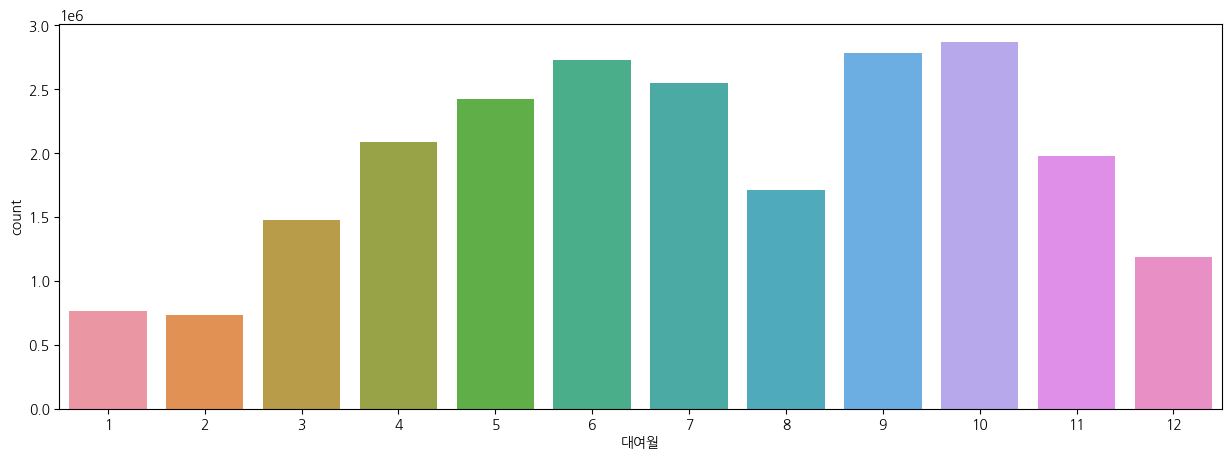

In [14]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df[2], x="대여월")

In [70]:
df_rent_group = df[2].groupby(["대여일자", "대여연월", "대여연도", "대여월", "대여일", "대여요일"])["대여일시"].count()
df_rent_group.head()
df_rent = pd.DataFrame(df_rent_group).reset_index()
df_rent.columns = ["대여일자", "대여연월", "대여연도", 
                   "대여월", "대여일", "대여요일", "대여수"]
df_rent.head()

,대여일자,대여연월,대여연도,대여월,대여일,대여요일,대여수
0,2020-01-01,2020-01,2020,1,1,2,15697
1,2020-01-02,2020-01,2020,1,2,3,27841
2,2020-01-03,2020-01,2020,1,3,4,29654
3,2020-01-04,2020-01,2020,1,4,5,24707
4,2020-01-05,2020-01,2020,1,5,6,22391


In [ ]:
df[2].hist(figsize = (15,15), bins=25)

<AxesSubplot:xlabel='대여일자'>

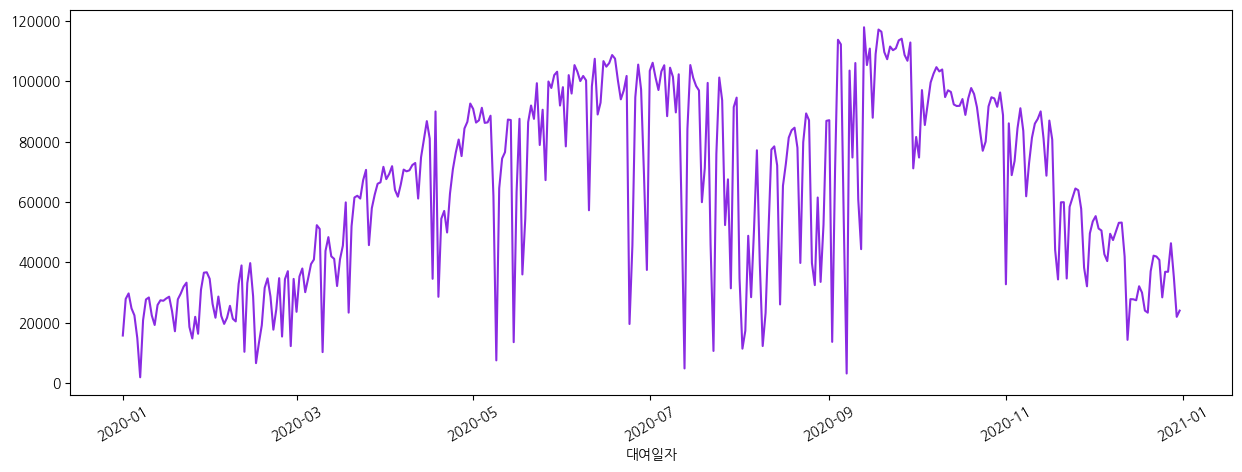

In [18]:
df_rent.groupby('대여일자')['대여수'].mean().plot(rot=30, figsize=(15, 5) ,color='blueviolet')

<AxesSubplot:xlabel='대여연월', ylabel='대여수'>

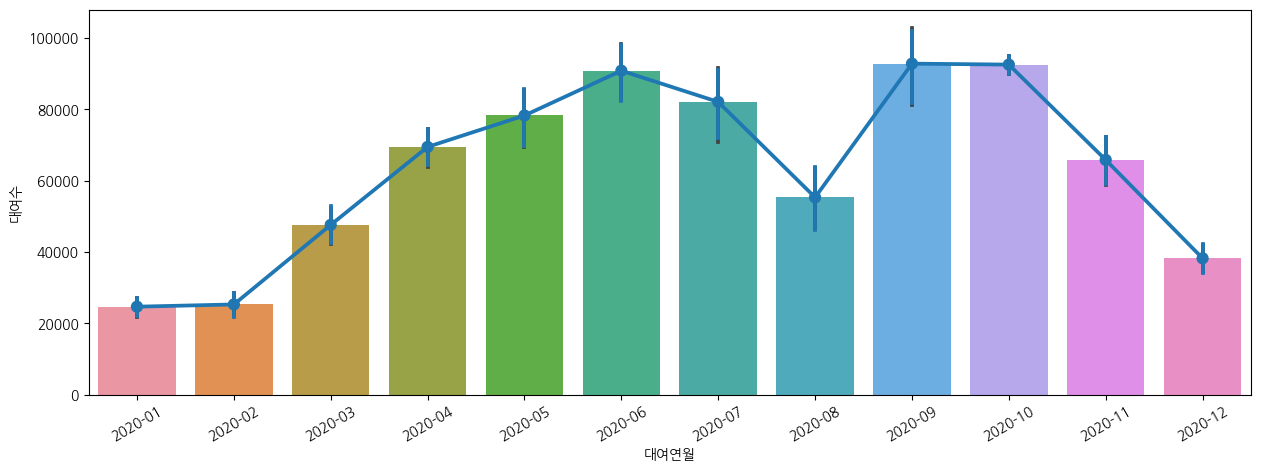

In [19]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
sns.barplot(data=df_rent, x="대여연월", y="대여수")
sns.pointplot(data=df_rent, x="대여연월", y="대여수")

In [20]:
#일자별 대여수 
df_rent_day = df_rent.groupby(["대여일자"])["대여수"].mean()
df_rent_day.head()

대여일자
2020-01-01    15697.0
2020-01-02    27841.0
2020-01-03    29654.0
2020-01-04    24707.0
2020-01-05    22391.0
Name: 대여수, dtype: float64

In [21]:
#월별 대여수 평균 (sum으로 하면 합)
df_rent_month = df_rent.groupby(["대여연월"])["대여수"].mean()
df_rent_month.head()

대여연월
2020-01    24696.677419
2020-02    25319.896552
2020-03    47622.451613
2020-04    69480.466667
2020-05    78288.967742
Name: 대여수, dtype: float64

# 제대로

In [11]:
df_2022=pd.read_csv('/home/dhc4003/ddareung/data/seoul_bike_2022.csv',low_memory=False)


In [12]:
df_2022.head()

,대여일시,대여대여소,대여대여소이름,대여거치대,반납일시,반납대여소,반납대여소이름,반납거치대,이용시간,이용거리
0,2022-01-02 16:02:42,3,중랑센터,0,2022-01-02 16:14:14,540,군자역 7번출구 베스트샵 앞,0,11,2419.63
1,2022-01-06 08:09:11,3,중랑센터,0,2022-01-06 08:19:43,3,중랑센터,0,10,0.00
2,2022-01-11 17:53:40,3,중랑센터,0,2022-01-11 18:05:07,529,장한평역 8번 출구 앞,0,11,1081.14
3,2022-01-17 16:02:21,3,중랑센터,0,2022-01-17 16:07:28,529,장한평역 8번 출구 앞,0,5,0.00
4,2022-01-17 17:57:28,3,중랑센터,0,2022-01-17 18:06:03,529,장한평역 8번 출구 앞,0,8,1121.03


In [13]:
df_2022["반납연월"] = df_2022["반납일시"].apply(lambda x : x[:7])
df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])

In [14]:
df_2022["반납일시"]=pd.to_datetime(df_2022["반납일시"])
df_2022["반납연도"] = df_2022["반납일시"].dt.year
df_2022["반납월"] = df_2022["반납일시"].dt.month
df_2022["반납일"] = df_2022["반납일시"].dt.day
df_2022["반납시간"] = df_2022["반납일시"].dt.hour
df_2022["반납요일"] = df_2022["반납일시"].dt.dayofweek
df_2022["반납일자"] = df_2022["반납일시"].dt.date


In [15]:
df_return_group = df_2022.groupby(["반납대여소이름","반납대여소"])["반납일시"].count()
df_return_group

반납대여소이름          반납대여소
(시립)고덕평생학습관      1070      3529
(재)FITI시험연구원     2724      9016
3645 구역삼세무서 교차로  4902      1814
3919 CGV구로 앞     3886      5835
3호선 매봉역 3번출구앞    2335     10406
                          ...  
흥국사 정류장          991        819
희성오피앙            1639      7217
희훈타워빌 앞          3905      9409
힐스테이트에코          2720     20033
힐스테이트클래시안아파트     4569      5524
Name: 반납일시, Length: 2632, dtype: int64

In [16]:
df_return = pd.DataFrame(df_return_group).reset_index()
df_return.columns = ["반납대여소이름","반납대여소", "반납수"]
df_return

,반납대여소이름,반납대여소,반납수
0,(시립)고덕평생학습관,1070,3529
1,(재)FITI시험연구원,2724,9016
2,3645 구역삼세무서 교차로,4902,1814
3,3919 CGV구로 앞,3886,5835
4,3호선 매봉역 3번출구앞,2335,10406
...,...,...,...
2627,흥국사 정류장,991,819
2628,희성오피앙,1639,7217
2629,희훈타워빌 앞,3905,9409
2630,힐스테이트에코,2720,20033


In [25]:
rental_df=pd.read_csv('./rental_spot.csv',low_memory=False,encoding='cp949')
del rental_df['LCD']
del rental_df['QR']
rental_df.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,거치대개수
0,102,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.555649,126.910629,15
1,103,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.554951,126.910835,14
2,104,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.550629,126.914986,13
3,105,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.550007,126.914825,5
4,106,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.548645,126.912826,12


In [38]:
df_207=rental_df[rental_df['대여소번호']==207]
df_207_lat=df_207.iloc[0]['위도']
df_207_lon=df_207.iloc[0]['경도']
print('위도: {0} ,경도: {1}'.format(df_207_lat,df_207_lon))

위도: 37.52715683 ,경도: 126.9319


In [78]:
near_df_207=rental_df.loc[(rental_df['자치구']=='영등포구') & (rental_df['위도']<37.54) & (rental_df['위도']>37.51)& (rental_df['경도']>126.92) & (rental_df['경도']<126.95)]
near_df_207.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,거치대개수
84,201,진미파라곤 앞,영등포구,서울특별시 영등포구 국회대로76길 10,37.531239,126.921333,15
85,202,국민일보 앞,영등포구,서울특별시 영등포구 여의공원로 101,37.528816,126.924530,30
88,205,산업은행 앞,영등포구,서울특별시 영등포구 의사당대로 97,37.526264,126.920509,20
90,207,여의나루역 1번출구 앞,영등포구,서울특별시 영등포구 여의동로 지하343,37.527157,126.931900,46
91,209,유진투자증권빌딩 앞,영등포구,서울특별시 영등포구 국제금융로 24,37.524612,126.927834,12


In [83]:
# 지도의 중심 찾기
from folium.plugins import MarkerCluster

lat=rental_df['위도'].mean()
long=rental_df['경도'].mean()
myMap = folium.Map([lat, long], zoom_start = 9)

coords = []
for i in range(len(rental_df)-1):
    x = rental_df['위도'][i]
    y = rental_df['경도'][i]
    coords.append([x, y])
    
for i in range(len(coords)):
    folium.Circle(
        location = coords[i],
        radius = 150,
        color = '#000000',
        fill = 'crimson',
    ).add_to(myMap)
    
folium.Marker([37.527157, 126.9319],
  popup="여의나루역 1번출구 앞",
  icon=folium.Icon(color='green', icon='fa-bicycle',prefix='fa')).add_to(myMap)

folium.CircleMarker([37.527157, 126.9319],
  radius=100,
  color='blue',
  fill_color='skyblue').add_to(myMap)

def plot(df):
    # 리스트를 이용해 여러 행의 데이터를 위,경도로 묶음
    locations = list(zip(df.위도, df.경도))
    # 반복문을 이용해 locations로 정의한 변수에 해당하는 위치에 자동차 모양의 빨간색 아이콘을 지정했다.
    icons = [folium.Icon(icon='fa-bicycle', prefix="fa", color="blue") for _ in range(len(locations))]

    # 역시 같은 원리로 아이콘을 클릭했을 때, 팝업이 생성되게 할 예정인데, 먼저 팝업 안에 들어갈 내용을 지정한다.
    popup_content = []
    for information in df.itertuples():
        # 팝업을 클릭했을 때, 시간이 나오게 하고 싶다.
        # datetime 컬럼을 pd.to_datetime 기능을 활용하여 hh:mm 포맷으로 time이라는 컬럼을 사전에 미리 만들었다.
        content = "At {}".format(information.대여소번호)
        popup_content.append(content)

    # 팝업을 생성한다.
    popups = [folium.Popup(content, max_width='100%') for content in popup_content]

    # 클러스터를 생성하여 앞에서 지정한 locations, icons, popups를 설정해준다.
    cluster = MarkerCluster(locations = locations, icons = icons, popups = popups)
    # 지도에 클러스터를 추가.
    cluster.add_to(myMap)
plot(near_df_207)
myMap.save('index.html')

In [147]:
# 대여량이 많은 상위 대여소 
# for i in range(5):
#     print('반납량 많은 상위 대여소 top 10\n',df[i]['반납대여소이름'].value_counts().head(5))
print('반납량 많은 상위 대여소 top 10\n',df_return.sort_values('반납수',ascending=False))

반납량 많은 상위 대여소 top 10
             반납대여소이름  반납대여소    반납수
778   뚝섬유원지역 1번출구 앞    502  81191
2454     한강공원 망원나들목   4217  75121
1831   여의나루역 1번출구 앞    207  67325
834     마곡나루역 2번 출구   2715  65651
1110        봉림교 교통섬   2102  52390
...             ...    ...    ...
2042          위트콤공장     11      4
2398        테스트 대여소   9979      3
2041            위트콤     10      3
1252         상암단말정비  99998      2
100           _도봉센터   9990      1

[2632 rows x 3 columns]


## 2018 전처리 한거 좀 column에 작은따옴표 붙어있음

In [98]:
print(df[4]['대여대여소이름'].dtypes)
df[4]['대여대여소이름']=df[4]['대여대여소이름'].astype('object')
df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.replace("'","")
#2018
df[4].head()
df[4]['대여대여소이름']=df[4]['대여대여소이름'].str.strip()